# Remedial modul 2 - Indra Pratama - JCDS jakarta

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import statistics

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [16, 8]

In [3]:
df = pd.read_csv('/kaggle/input/world-happiness/2019.csv')

print('Dataframe shape:', df.shape)

Dataframe shape: (156, 9)


In [4]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [8]:
df_to_count = df[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                  'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

# No.1

Untuk setiap numerik feature/column (kecuali column Overall Rank), hitung dan beri penjelasan (insight):

* Mean, Median dan Modus
* Range, Q1, Q3 dan IQR
* Standard Deviasi & Variance
* Z-score tiap data point

In [84]:
feature_mean = []
feature_median = []
feature_modus = []
feature_range = []
feature_Q1 = []
feature_Q3 = []
feature_IQR = []
feature_std = []
feature_variance = []
feature_zscore = []

for columns in df_to_count.columns:
    feature_mean.append(round(df_to_count[columns].mean(), 2))
    feature_median.append(round(df_to_count[columns].median(), 2))
    feature_modus.append(df_to_count[columns].mode().values)
    feature_range.append(df_to_count[columns].max() - df_to_count[columns].min())
    feature_Q1.append(df_to_count[columns].describe()['25%'])
    feature_Q3.append(df_to_count[columns].describe()['75%'])
    feature_IQR.append(df_to_count[columns].describe()['75%'] - df_to_count[columns].describe()['25%'])
    feature_std.append(round(df_to_count[columns].std(), 2))
    feature_variance.append(round(df_to_count[columns].var(), 2))
    feature_zscore.append(stats.zscore(df_to_count[columns]))

In [85]:
info = pd.DataFrame({})

info['Features'] = df_to_count.columns
info['mean'] = feature_mean
info['median'] = feature_median
info['modus'] = feature_modus
info['range'] = feature_range
info['Q1'] = feature_Q1
info['Q3'] = feature_Q3
info['IQR'] = feature_IQR
info['std'] = feature_std
info['variance'] = feature_variance
info['zscore'] = feature_zscore

info

,Features,mean,median,modus,range,Q1,Q3,IQR,std,variance,zscore
0,Score,5.41,5.38,[5.207999999999999],4.916,4.54450,6.18450,1.64000,1.11,1.24,"[2.128711119030617, 1.9763966293014945, 1.9349..."
1,GDP per capita,0.91,0.96,[0.96],1.684,0.60275,1.23250,0.62975,0.40,0.16,"[1.0950416570576833, 1.203323854612748, 1.4677..."
2,Social support,1.21,1.27,[1.465],1.624,1.05575,1.45250,0.39675,0.30,0.09,"[1.2680975780463282, 1.2211540875221807, 1.251..."
3,Healthy life expectancy,0.73,0.79,"[0.815, 0.9990000000000001]",1.141,0.54775,0.88175,0.33400,0.24,0.06,"[1.080422466816864, 1.1218566338908182, 1.2544..."
4,Freedom to make life choices,0.39,0.42,"[0.498, 0.508, 0.557]",0.631,0.30800,0.50725,0.19925,0.14,0.02,"[1.4242822958350574, 1.3962768711430438, 1.473..."
5,Generosity,0.18,0.18,[0.153],0.566,0.10875,0.24825,0.13950,0.10,0.01,"[-0.33540397742566874, 0.7072649089193455, 0.9..."
6,Perceptions of corruption,0.11,0.09,"[0.027999999999999997, 0.078, 0.08900000000000...",0.453,0.04700,0.14125,0.09425,0.09,0.01,"[2.9967571152655976, 3.1771584379533078, 2.444..."


## Insight:

1. Selain generosity, feature lainnya memiliki mean yang lebih besar / kecil daripada median-nya.
1. Lalu ini yang menarik, feature Social support, Healthy life expectancy dan Freedom to make life choices memiliki modus yang jauh lebih tinggi daripada mean dan median-nya, termasuk feature Perceptions of corruption yang memiliki modus jauh lebih rendah daripada mean dan median-nya.
1. Terakhir, standard deviation pada feature Score (happiness) lumayan tinggi, yaitu 1.11

-----------------------------------------

### Kesimpulan apa yang saya dapatkan?

* Tingkat perbedaan diantara negara-negara di dunia sangatlah tinggi, terutama social support, freedom to make life choices, generosity dan corruption
* Inilah yang menyebabkan angka kebahagiaan masyarakat diantara negara-negara menjadi **sangat tidak seimbang**, ada yang bahagia, juga ada yang tidak bahagia.
* Menurut saya yang paling mempengaruhi kebahagiaan masyarakat adalah freedom to make choices, corruption rate dan generosity

> Kebiasaan menolong sesama membuat masyarakat jadi lebih bahagia

# No.2

Untuk setiap numerik feature/column (kecuali column Overall Rank), carilah data outlier-nya dan beri penjelasan (insight) berdasarkan:

* IQR method
* Z-score method

In [118]:
# find outliers based on IQR

def find_outliers_iqr(data):
    
    Q2 = np.percentile(data, 50) # median
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    IQR = Q3 - Q1
    batas_bawah = Q1 - IQR * 1.5
    batas_atas = Q3 + IQR * 1.5
    
    outliers = []
    
    for val in data:
        if val < batas_bawah or val > batas_atas:
            outliers.append(val)
    
    if len(outliers) > 0:
        return outliers
    elif len(outliers) == 0:
        return 'no outliers'

In [123]:
# find outliers based on z-score

def find_outliers_zscore(data):
    
    z_score = np.abs(stats.zscore(data))
    
    outliers = []
    
    for score in z_score:
        # threshold = 3
        if score > 3:
            outliers.append(score)
            
    if len(outliers) > 0:
        return outliers
    elif len(outliers) == 0:
        return 'no outliers'

In [134]:
outliers = pd.DataFrame({})

outliers['features'] = df_to_count.columns
outliers['by_IQR'] = [find_outliers_iqr(df_to_count[feature]) for feature in df_to_count.columns]
outliers['by_zscore'] = [find_outliers_zscore(df_to_count[feature]) for feature in df_to_count.columns]

In [135]:
outliers

,features,by_IQR,by_zscore
0,Score,no outliers,no outliers
1,GDP per capita,no outliers,no outliers
2,Social support,"[0.43700000000000006, 0.447, 0.377999999999999...",[4.0532823835124905]
3,Healthy life expectancy,[0.0],[3.0049864066750187]
4,Freedom to make life choices,[0.0],no outliers
5,Generosity,"[0.498, 0.5660000000000001]","[3.298139111352411, 4.0143157201550475]"
6,Perceptions of corruption,"[0.39299999999999996, 0.41, 0.341, 0.298, 0.34...","[3.1771584379533078, 3.6334676659281038, 3.187..."


## Insight:

* Menurut saya tidak ada perbedaan yang besar diantara mencari outliers menggunakan IQR dan z-score.
* Feature Social support, Generosity dan corruption memiliki banyak outliers
* Ini membuktikan adanya ketidakseimbangan yang besar diantara negara-negara di dunia

> Angka corruption berpengaruh besar terhadap social support, karena uang yang harusnya untuk mendukung masyarakat justru disalahgunakan untuk kepentingan pribadi

# No.3

Tampilkan distribusi (sebaran data) masing-masing feature/column (kecuali column Overall Rank) dalam bentuk plot yang tepat! Jelaskan alasan pemilihan plot dan insight apa yang Anda dapatkan di setiap plot tersebut!

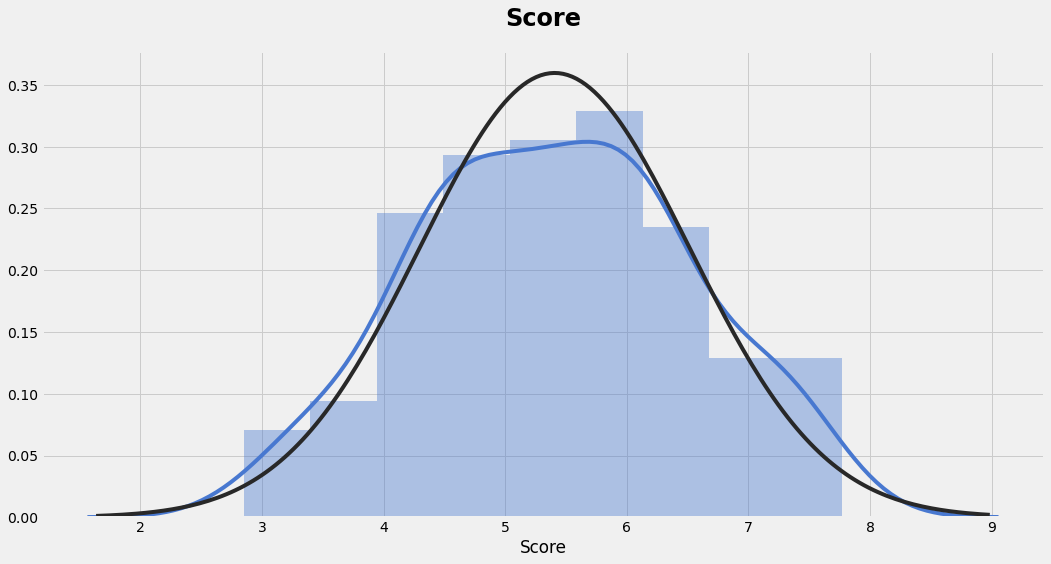

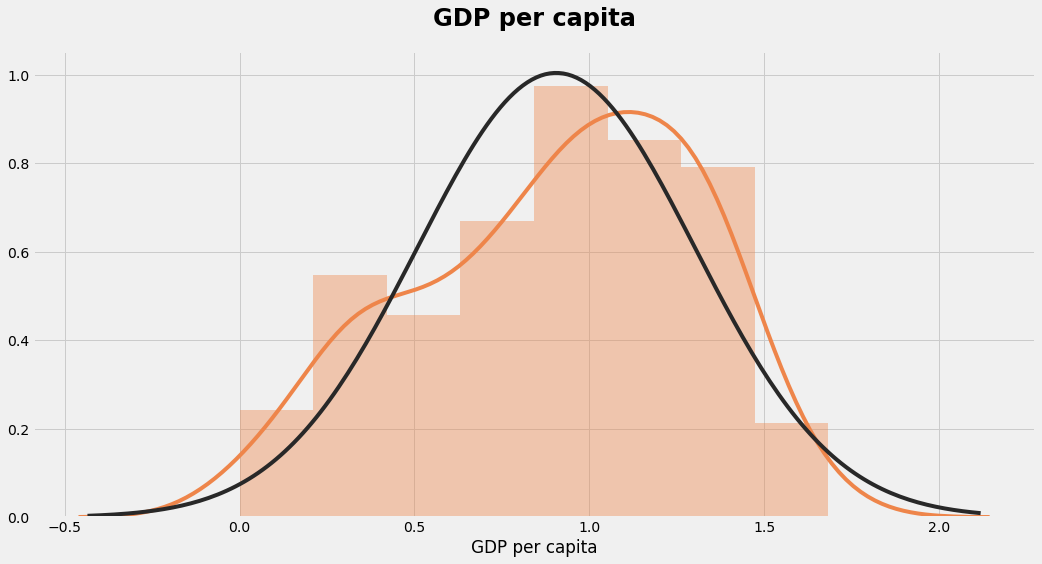

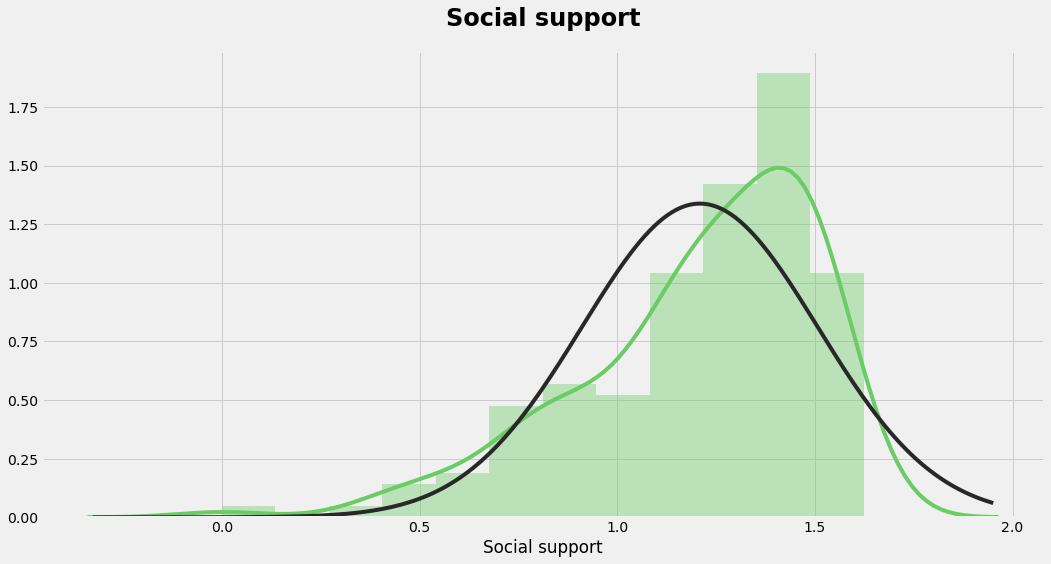

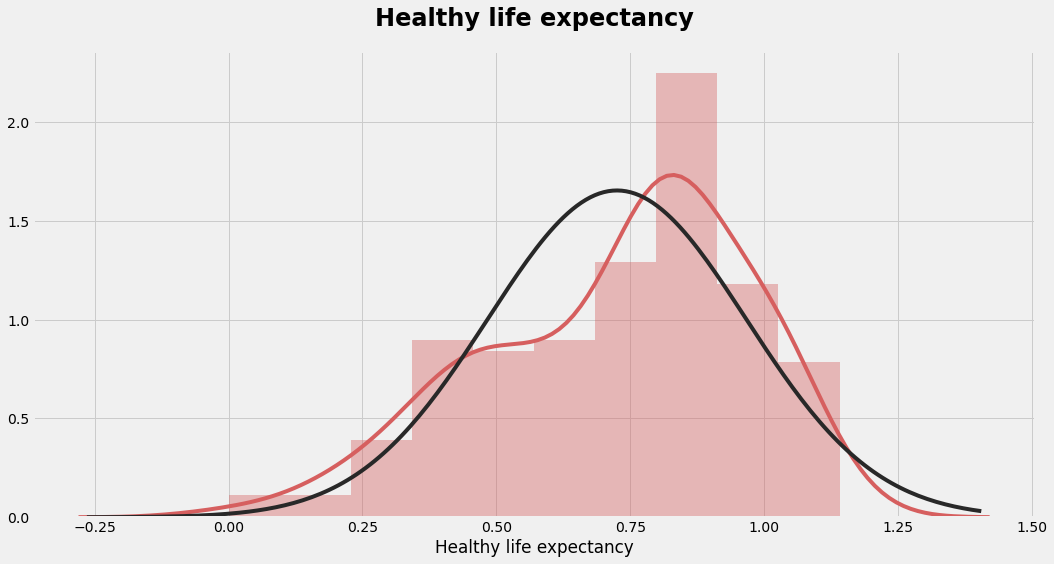

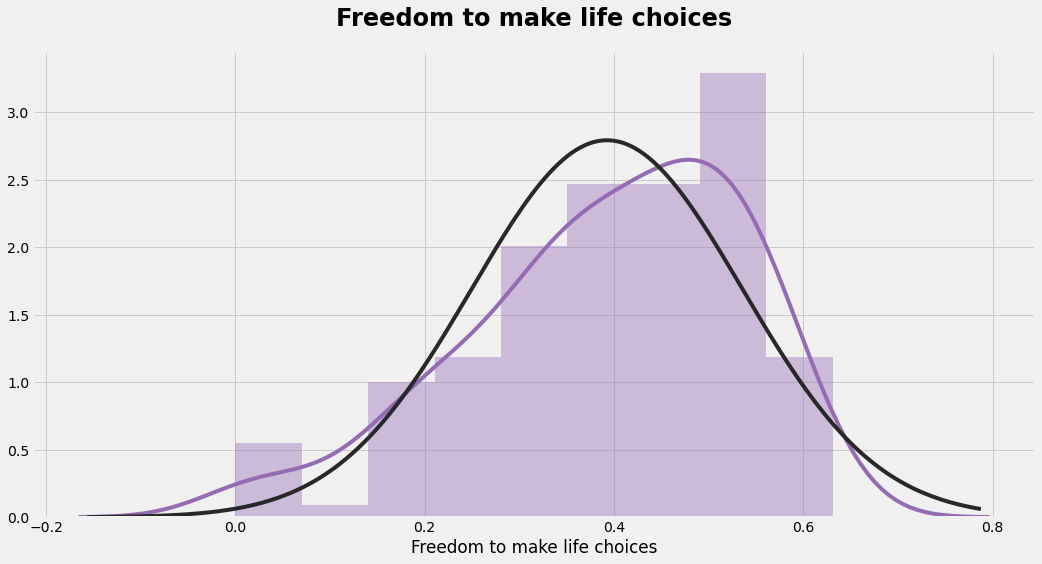

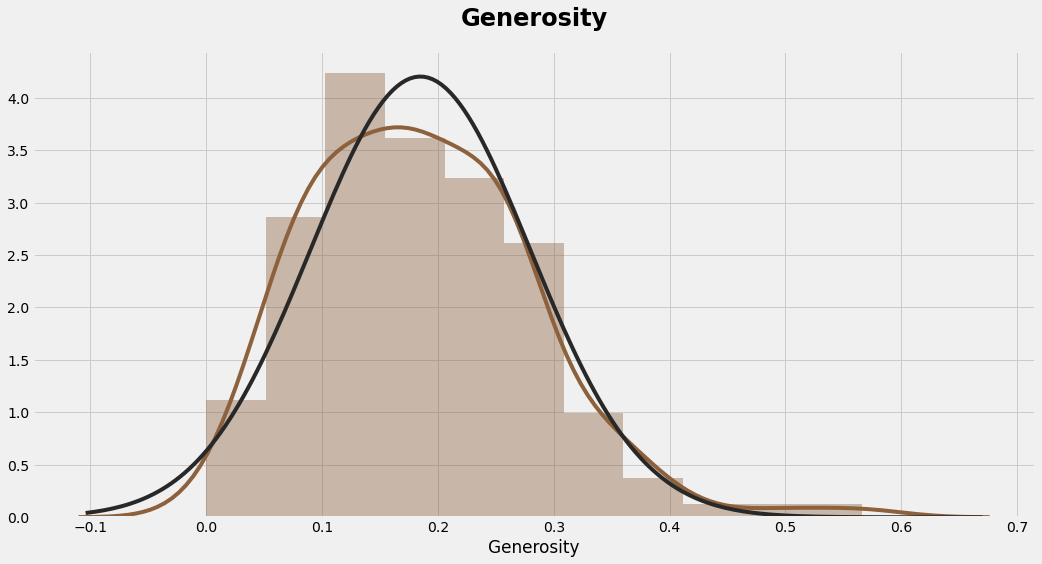

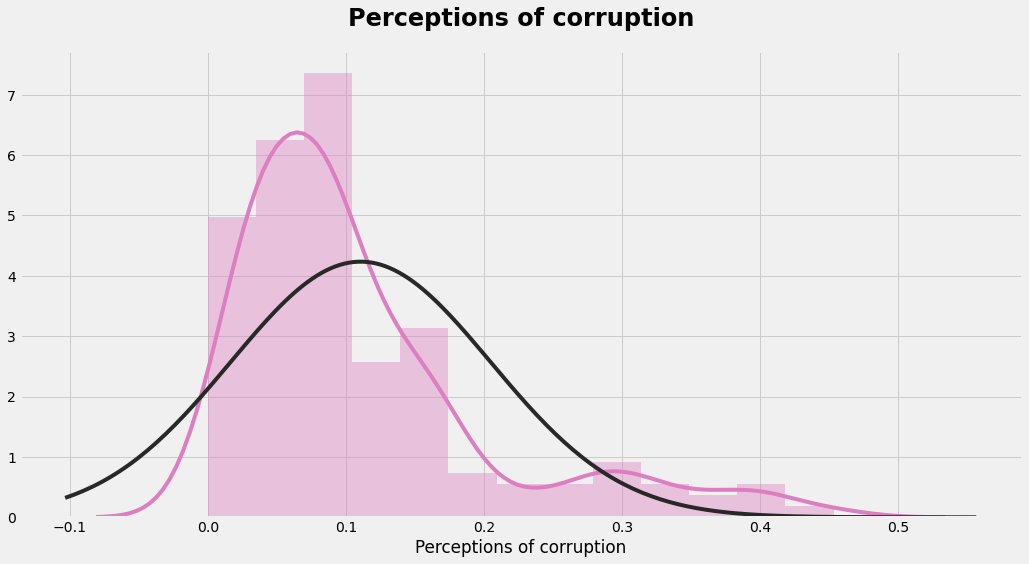

In [141]:
from scipy.stats import norm, skew

colors = sns.color_palette("muted", n_colors=7)

for idx, feature in enumerate(df_to_count.columns):
    sns.distplot(df_to_count[feature], color=colors[idx], fit=norm)
    plt.title(feature, fontsize=24, weight='bold', pad=25)
    plt.show()

## Penjelasan

* Biasanya data scientist menggunakan **Histogram atau KDE plot** untuk melihat distribusi (persebaran) pada data
* Feature corruption, freedom dan social support tidak memiliki pola normal distribution (high skew)
* Ini karena ketidakseimbangan tingkat corruption, freedom dan social support di antara negara-negara di-dunia

# No.4

* Di antara semua numerik feature/column (kecuali column Overall Rank), feature/column mana saja yang sangat berkorelasi terhadap happiness score suatu negara?
* Hitung dengan metode korelasi yang tepat dan beri penjelasan (insight)!

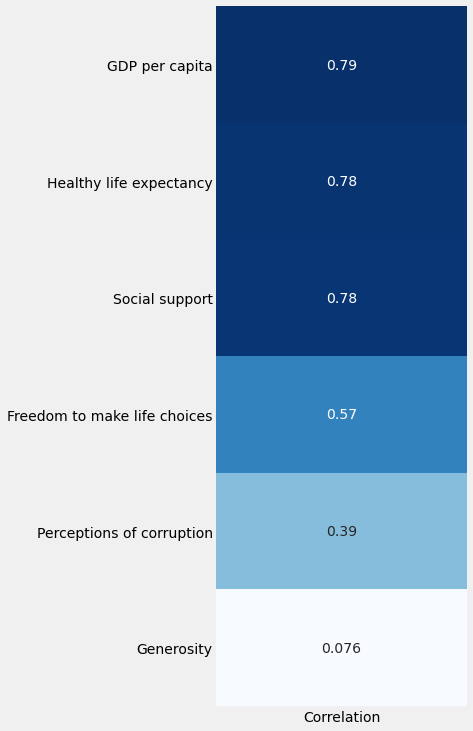

In [160]:
score_corr = df_to_count.corr()['Score'][1:].sort_values(ascending=False)
score_corr_df = pd.DataFrame(score_corr.values, index=score_corr.index, columns=['Correlation'])

plt.figure(figsize = (4, 12))
sns.heatmap(score_corr_df, annot = True, cmap="Blues", cbar=False)
plt.show()

## Insight

* Data menunjukkan GDP, Healthy life expectancy dan social support memiliki correlation yang besar terhadap happiness score
* Menurut saya ini tidak sepenuhnya benar, karena corruption rate sangat mempengaruhi kebahagiaan masyarakat, mengapa bisa begini?
* Karena feature perceptions of corruption memiliki skewness yang tinggi, ingat pearson correlation harus digunakan pada data yang distribusinya normal (parametric)

# No.5

Visualisasikan dalam bentuk plot yang tepat untuk menampilkan data berikut:

* 10 Negara dengan Healthy life expectancy tertinggi.
* 10 Negara dengan GDP per capita tertinggi.
* 10 Negara dengan Perceptions of corruption tertinggi.

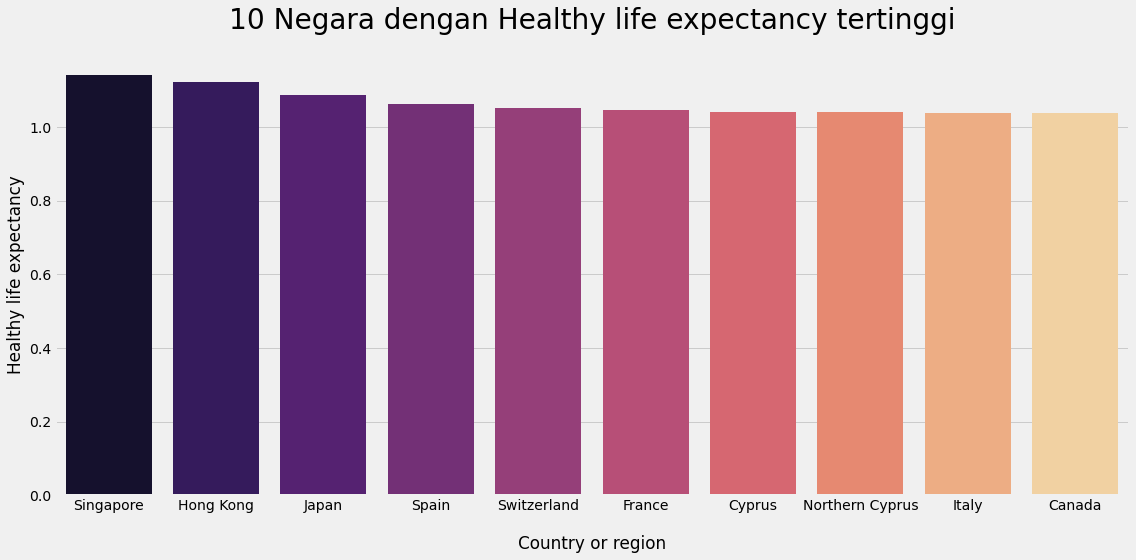

In [173]:
highest_healthy_life_expectancy = df[['Country or region', 'Healthy life expectancy']].sort_values('Healthy life expectancy', ascending=False)[:10]

sns.barplot(y=highest_healthy_life_expectancy['Healthy life expectancy'],
            x=highest_healthy_life_expectancy['Country or region'],
            palette='magma')

plt.title('10 Negara dengan Healthy life expectancy tertinggi', fontsize=28, pad=25)
plt.xlabel('Country or region', labelpad=22)
plt.tight_layout()
plt.show()

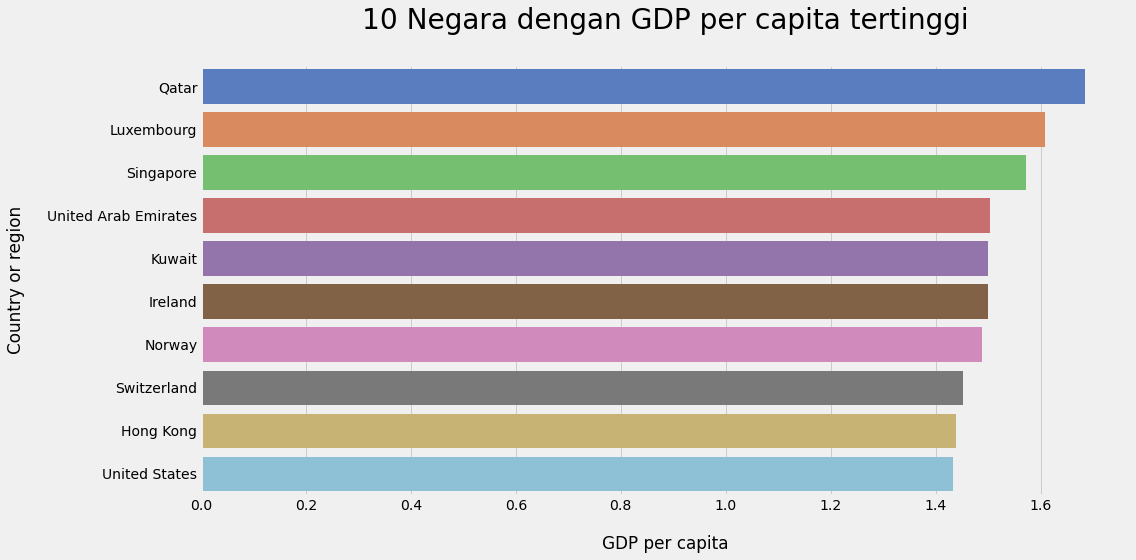

In [189]:
highest_gdp = df[['Country or region', 'GDP per capita']].sort_values('GDP per capita', ascending=False)[:10]

sns.barplot(y=highest_gdp['Country or region'],
            x=highest_gdp['GDP per capita'],
            palette='muted')

plt.title('10 Negara dengan GDP per capita tertinggi', fontsize=28, pad=36)
plt.xlabel('GDP per capita', labelpad=22)
plt.ylabel('Country or region', labelpad=22)
plt.tight_layout()
plt.show()

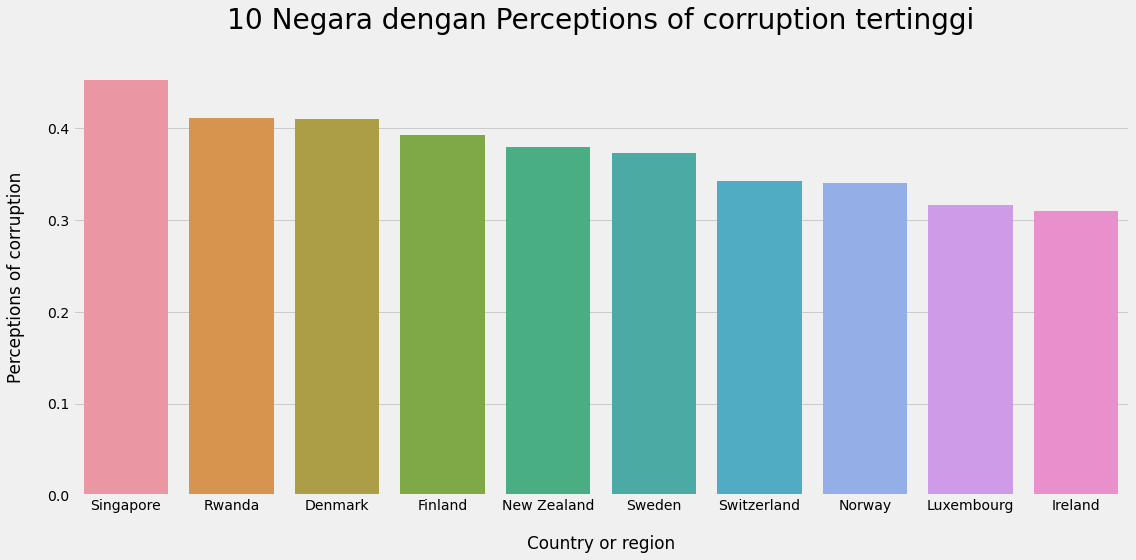

In [188]:
highest_corruption = df[['Country or region', 'Perceptions of corruption']].sort_values('Perceptions of corruption', ascending=False)[:10]

sns.barplot(x=highest_corruption['Country or region'],
            y=highest_corruption['Perceptions of corruption'])

plt.title('10 Negara dengan Perceptions of corruption tertinggi', fontsize=28, pad=30)
plt.xlabel('Country or region', labelpad=22)
plt.ylabel('Perceptions of corruption', labelpad=22)
plt.tight_layout()
plt.show()

In [ ]:
### Terima kasih ###